# **Latar Belakang**

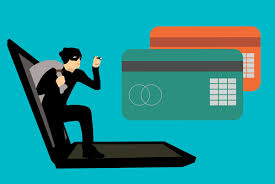

Fraud detection atau deteksi penipuan merupakan aspek penting dalam menjaga integritas dan keamanan transaksi keuangan di berbagai industri, termasuk perbankan, e-commerce, dan asuransi. Ini melibatkan identifikasi dan pencegahan aktivitas penipuan, seperti akses tidak sah, pencurian, atau manipulasi informasi atau sumber daya sensitif. Dengan meningkatnya prevalensi transaksi digital dan kompleksitas skema penipuan, kebutuhan akan metode deteksi penipuan yang efektif menjadi semakin penting.

Pada proyek ini, akan dibangun model machine learning untuk deteksi penipuan dengan menggunakan beberapa algoritma klasifikasi, antara lain logistic regression, support vector machine (SVM), dan random forest. Nantinya akan dilihat algoritma mana yang menghasilkan akurasi yang lebih baik.



# **Work Flow**
Berikut langkah-langkah yang akan dilakukan dalam pembuatan model:


1.   Data collection atau pengumpulan data
2.   Preprocessing data
3.   Split data
4.   Pembuatan model
5.   Evaluasi hasil model







# **1. Data Collection**

Data yang digunakan pada kali ini diambil dari Kaggle yang dapat dilihat pada tautan berikut (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data). Dataset ini berisi transaksi yang dilakukan oleh pemegang kartu kredit di Eropa pada bulan September 2013. Dataset ini hanya berisi variabel input numerik yang merupakan hasil dari transformasi PCA. Namun, karena masalah keamanan, informasi latar belakang terkait fitur asli tidak ditampilkan. Fitur V1, V2, … V28 adalah komponen utama yang diperoleh dengan PCA, satu-satunya fitur yang tidak diubah dengan PCA adalah 'Time' dan 'Amount'. Fitur 'Time' berisi detik yang berlalu antara setiap transaksi dan transaksi pertama dalam dataset. Fitur 'Amount' adalah Jumlah transaksi, fitur ini dapat digunakan misalnya untuk pembelajaran sensitif terhadap biaya yang bergantung pada contoh. Fitur 'Class' adalah variabel respons dan mengambil nilai 1 dalam kasus penipuan dan 0 sebaliknya.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import collections

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data ML/Data Fraud Detection/creditcard.csv")

In [ ]:
# Melihat lima data awal
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Melihat lima data akhir
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# Melihat informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Berdasarkan informasi diatas:


*   Semua tipe data pada dataset bertipe numerik
*   Terdiri dari 284807 baris dan 30 fitur/kolom





In [ ]:
# Melihat statistik descriptive dari dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# **2. Data Preprocessing**

## **Cek Missing Value**

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Tidak ada missing value pada dataset

## **Cek Imbalance Data**

In [ ]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% dari dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% dari dataset')

No Frauds 99.83 % dari dataset
Frauds 0.17 % dari dataset


In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Perbandingan Jumlah Fraud atau not Fraud')

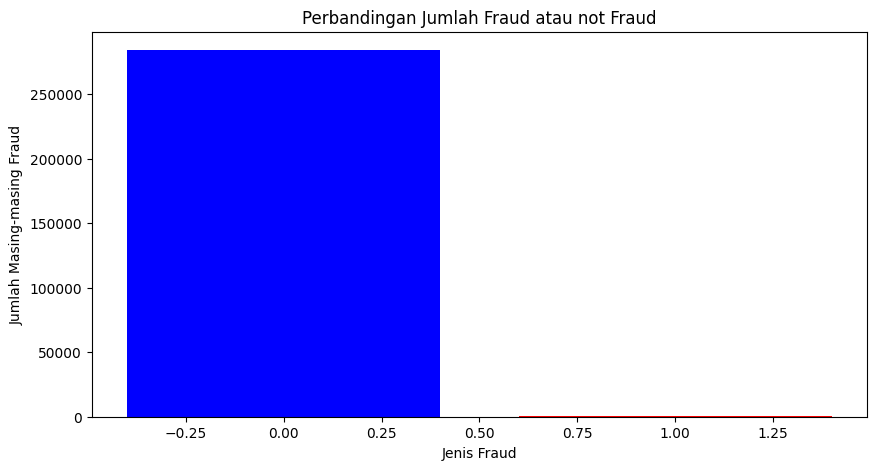

In [ ]:
count_class = data["Class"].value_counts()

index_class = count_class.index
values_class = count_class.values
plt.figure(figsize = (10,5))
plt.bar(index_class, values_class, color=['blue', 'red'])
plt.xlabel("Jenis Fraud")
plt.ylabel("Jumlah Masing-masing Fraud")
plt.title("Perbandingan Jumlah Fraud atau not Fraud")

Dapat dilihat bahwa perbandingan antara kelas 0 (not fraud) dengan kelas 1 (fraud) sangat berbeda jauh. Oleh karena itu, akan dilakukan penyeimbangan dataset dengan menggunakan Random Under Sampling. Tujuan penyeimbangan data adalah agar model yang dihasilkan tidak mengalami overfitting.

## **Random Under Sampling**

In [ ]:
# mengambil sampel acak dari dataframe
data = data.sample(frac=1)

# Mengambil 492 baris sesuai dengan banyaknya data dengan Class = 1.
data_non_fraud = data.loc[data['Class'] == 0][:492]
data_fraud = data.loc[data['Class'] == 1]

data_gabung = pd.concat([data_fraud, data_non_fraud])

# Mengacak data baru
data_baru = data_gabung.sample(frac=1, random_state=42)

data_baru.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
129428,79085.0,1.205378,-0.435762,0.403078,-1.173274,-0.912106,-0.913208,-0.204762,-0.079394,1.651510,...,-0.212254,-0.347843,0.075066,0.432780,0.365227,-0.144455,0.027830,0.016339,18.20,0
44270,41870.0,-20.906908,9.843153,-19.947726,6.155789,-15.142013,-2.239566,-21.234463,1.151795,-8.739670,...,-1.977196,0.652932,-0.519777,0.541702,-0.053861,0.112671,-3.765371,-1.071238,1.00,1
109298,71319.0,1.189979,-0.331090,0.009988,0.370585,-0.622144,-0.787085,0.033832,-0.144941,-1.430779,...,-0.608732,-1.540500,0.106275,0.210269,0.309463,-0.682146,0.000139,0.024820,75.00,0
153823,100223.0,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,-8.960922,...,-8.228874,3.318178,2.585212,0.195009,-1.194803,0.038423,-4.126746,-0.645329,2.28,1
248296,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00,1


Mengacak ulang baris-baris dalam dataframe. Hal ini sering dilakukan sebelum membuat subsample dalam analisis data, terutama ketika kita ingin memastikan bahwa tidak ada pola atau urutan tertentu yang dipertahankan dalam dataset. Dengan mengacak ulang baris-baris, kita dapat memastikan bahwa urutan baris tidak memengaruhi analisis atau pemodelan yang akan kita lakukan.

Text(0.5, 1.0, 'Perbandingan Jumlah Fraud atau not Fraud')

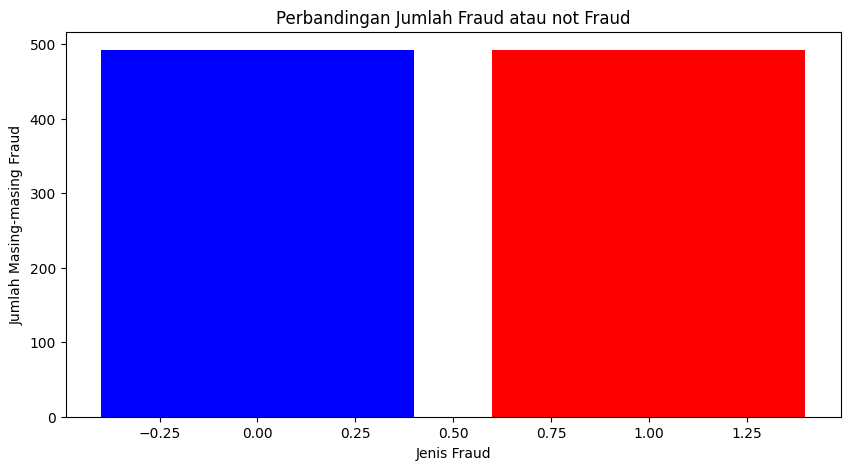

In [ ]:
count_class = data_baru["Class"].value_counts()

index_class = count_class.index
values_class = count_class.values
plt.figure(figsize = (10,5))
plt.bar(index_class, values_class, color=['blue', 'red'])
plt.xlabel("Jenis Fraud")
plt.ylabel("Jumlah Masing-masing Fraud")
plt.title("Perbandingan Jumlah Fraud atau not Fraud")

## **Feature Scalling**
Sebagian besar data telah diubah skalanya. Namun, kita masih perlu mengubah skala kolom yang tersisa yaitu Amount dan Time.

In [ ]:
from sklearn.preprocessing import  RobustScaler

rob_scaler = RobustScaler()

data_baru['scaled_amount'] = rob_scaler.fit_transform(data_baru['Amount'].values.reshape(-1,1))
data_baru['scaled_time'] = rob_scaler.fit_transform(data_baru['Time'].values.reshape(-1,1))

data_baru.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = data_baru['scaled_amount']
scaled_time = data_baru['scaled_time']

data_baru.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data_baru.insert(0, 'scaled_amount', scaled_amount)
data_baru.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

data_baru.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
129428,0.002020,0.011689,1.205378,-0.435762,0.403078,-1.173274,-0.912106,-0.913208,-0.204762,-0.079394,...,-0.134518,-0.212254,-0.347843,0.075066,0.432780,0.365227,-0.144455,0.027830,0.016339,0
44270,-0.171735,-0.401618,-20.906908,9.843153,-19.947726,6.155789,-15.142013,-2.239566,-21.234463,1.151795,...,0.396655,-1.977196,0.652932,-0.519777,0.541702,-0.053861,0.112671,-3.765371,-1.071238,1
109298,0.575816,-0.074560,1.189979,-0.331090,0.009988,0.370585,-0.622144,-0.787085,0.033832,-0.144941,...,-0.465095,-0.608732,-1.540500,0.106275,0.210269,0.309463,-0.682146,0.000139,0.024820,0
153823,-0.158804,0.246446,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,...,3.834649,-8.228874,3.318178,2.585212,0.195009,-1.194803,0.038423,-4.126746,-0.645329,1
248296,-0.181837,0.842301,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,...,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1


# **3. Split Data**

In [ ]:
X = data_baru.drop('Class', axis=1)
y = data_baru['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Pembuatan Model**

In [ ]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

# **5. Evaluasi Model**

In [ ]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Algoritma: ", classifier.__class__.__name__, "Menghasilkan", round(training_score.mean(), 2) * 100, "% akurasi pada data train")

Algoritma:  LogisticRegression Menghasilkan 94.0 % akurasi pada data train
Algoritma:  SVC Menghasilkan 93.0 % akurasi pada data train
Algoritma:  RandomForestClassifier Menghasilkan 94.0 % akurasi pada data train
Algoritma:  DecisionTreeClassifier Menghasilkan 90.0 % akurasi pada data train


In [ ]:
from sklearn.metrics import accuracy_score

for key, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    print("Algoritma:", classifier.__class__.__name__, "menghasilkan", round(test_score * 100, 2), "% akurasi pada data uji.")


Algoritma: LogisticRegression menghasilkan 96.95 % akurasi pada data uji.
Algoritma: SVC menghasilkan 94.92 % akurasi pada data uji.
Algoritma: RandomForestClassifier menghasilkan 96.45 % akurasi pada data uji.
Algoritma: DecisionTreeClassifier menghasilkan 93.4 % akurasi pada data uji.


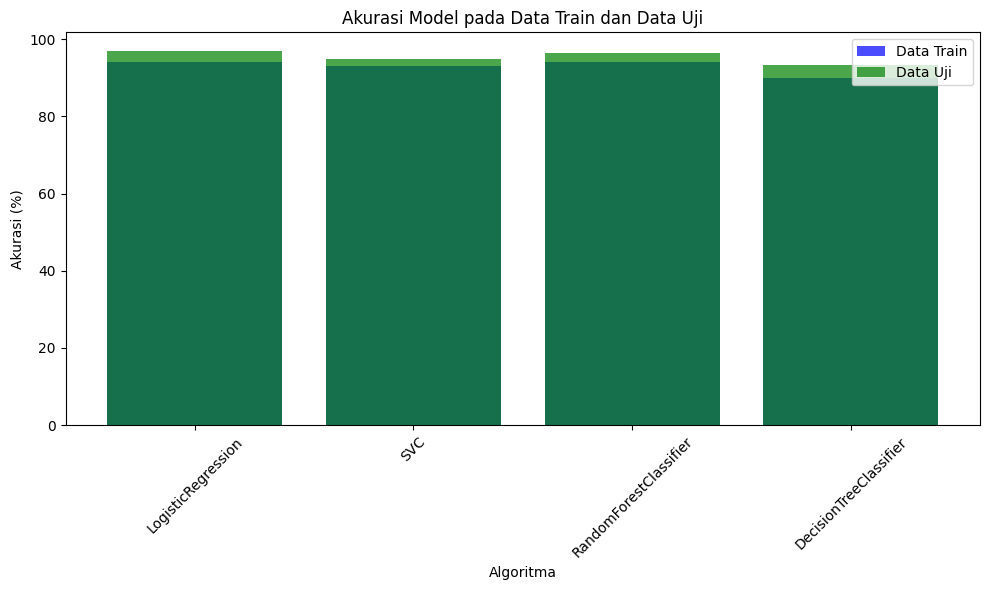

In [ ]:
import matplotlib.pyplot as plt

# Data train
train_scores = [94.0, 93.0, 94.0, 90.0]

# Data uji
test_scores = [96.95, 94.92, 96.45, 93.4]

# Nama algoritma
classifiers_names = ["LogisticRegression", "SVC", "RandomForestClassifier", "DecisionTreeClassifier"]

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(classifiers_names)), train_scores, color='b', alpha=0.7, label='Data Train')
plt.bar(range(len(classifiers_names)), test_scores, color='g', alpha=0.7, label='Data Uji')
plt.xticks(range(len(classifiers_names)), classifiers_names, rotation=45)
plt.xlabel('Algoritma')
plt.ylabel('Akurasi (%)')
plt.title('Akurasi Model pada Data Train dan Data Uji')
plt.legend()
plt.tight_layout()
plt.show()
